In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("emotions_cleaned smaller.csv")
# df = pd.read_csv("Dry_Bean_Dataset.csv")
df.head()
df = df.fillna(0)

In [6]:
X = df.text
y = df.label
# X = X.toarray()
print(X.head())
print(y.head())

0        i just feel really helpless and heavy hearted
1    ive enjoyed being able to slouch about relax a...
2    i gave up my internship with the dmrg and am f...
3                           i dont know i feel so lost
4    i am a kindergarten teacher and i am thoroughl...
Name: text, dtype: object
0    4
1    0
2    4
3    0
4    4
Name: label, dtype: int64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104203 entries, 0 to 104202
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  104203 non-null  int64 
 1   text        104203 non-null  object
 2   label       104203 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ MB


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.10,
                                                    random_state =0)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(104203,)
(93782,)
(10421,)


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2))
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  441234


In [10]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(93782, 441234)
(10421, 441234)


In [11]:
# print(X_train)
# print(type(X_test))
# X_test = X_test.todense()
# X_train = X_train.todense()
X_train = X_train.toarray()
X_test = X_test.toarray()

In [12]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

: 

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, ypred)
print("Classification Report:")
print (result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy:",result2)

Confusion Matrix:
[[2625  259   20   69   60    4]
 [ 516 2796  114   64   49   11]
 [ 185  270  386   22    8    2]
 [ 343  169   21  815   37    3]
 [ 256  176   17   67  647   37]
 [  82   84    8    9   46  144]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.86      0.75      3037
           1       0.74      0.79      0.77      3550
           2       0.68      0.44      0.54       873
           3       0.78      0.59      0.67      1388
           4       0.76      0.54      0.63      1200
           5       0.72      0.39      0.50       373

    accuracy                           0.71     10421
   macro avg       0.72      0.60      0.64     10421
weighted avg       0.72      0.71      0.70     10421

Accuracy: 0.7113520775357451


Accuracy Score        :  0.7113520775357451
Classification Report : 
               precision    recall  f1-score   support

           0       0.66      0.86      0.75      3037
           1       0.74      0.79      0.77      3550
           2       0.68      0.44      0.54       873
           3       0.78      0.59      0.67      1388
           4       0.76      0.54      0.63      1200
           5       0.72      0.39      0.50       373

    accuracy                           0.71     10421
   macro avg       0.72      0.60      0.64     10421
weighted avg       0.72      0.71      0.70     10421



<Axes: >

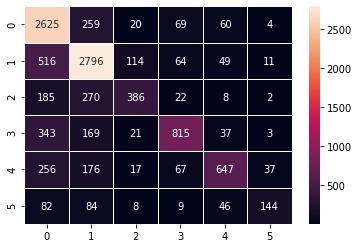

In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
print("Accuracy Score        : ",accuracy_score(y_test, ypred))
print("Classification Report : \n", classification_report(y_test, ypred))
cfm=confusion_matrix(y_test,ypred)
import seaborn as sns
sns.heatmap(cfm,annot=True,fmt='',linewidths=0.5)